# Minitrabalho 1 – Filtro colaborativo

## 1) Algoritmo de força-bruta


##### 1.a) [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número de inversões num array.

__R:__ O algoritmo de força-bruta que resolve o problema do número de inversões num array seria percorrer o array e para cada elemento, percorrer o restante do array e verificar se o elemento atual é maior do que o elemento que estamos a comparar. Caso seja, incrementa-se o contador de inversões. No final, devolve-se o contador de inversões que contém o número de inversões no array.

##### 1.b) [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [255]:
def count_inversions_brute_force(arr):
    count = 0
    n = len(arr)
    for i in range(n):                  
        for j in range(i+1, n):         
            if arr[i] > arr[j]:         
                count += 1
    return count

##### 1.c) [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para o seu algoritmo em função do tamanho, n, do array. Nota: É esperado que sejam apresentados os cálculos completos do número de acessos assim como a correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).

**R: Análise assintótica do algoritmo:**

Quando se obtém o tamanho do array acede-se 1 vez à memória: `n = len(arr)`

No loop externo, faz-se variar `i` de `0` a `n-1`, enquanto que no loop interno faz-se variar `j` de `i+1` a `n-1`, pelo que dentro dos loops se aceda à memória 2 vezes em cada iteração `(if arr[i] > arr[j]:)`:

$$
\sum_{i=0}^{n-1} \sum_{j=i+1}^{n-1} 2
$$

Percebe-se que para cada iteração `i`, o loop internoio executa-se `n-i-1` vezes pelo que podemos simplificar a expressão para:

$$
\sum_{i=0}^{n-1} 2*(n - i - 1)
$$

Por sua vez, deparamo-nos com uma soma de sucessões aritméticas, e assim temos:

$$
2 * \frac{n*(n-1)}{2} = n^2 - n
$$

Finalmente, em termos de notação assintótica descartamos os termos constantes e de ordem inferior pelo que o algorimo tem uma complexidade de:

$$\Theta(n^2)$$






## 2) Algoritmo dividir-e-conquistar

##### 2.a) [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o problema do número de inversões num array de forma mais eficiente. 
Nota: É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve também apresentar o pseudocódigo correspondente.

Dica: A solução passará por utilizar um dos algoritmos de ordenação abordados nas aulas.

**R:** Uma solução que utiliza a estratégia dividir-e-conquistar que resolve o problema do número de inversões seria criar uma adaptação do Merge Sort que conta o numero de inversões durante o processo de ordenação.

Inicialmente verifica-se se o array é constituído por 1 ou 0 elementos e caso o seja o número de inversões é 0 uma vez que o array se encontra já ordenado

Seguidamente divide-se a lista em duas metades(left e right) e aplica-se recursivamente o algoritmo a ambas as metades

Numa outra função combinamos as duas metades ordenadas e durante a mesclagem, se um elemento da metade left for maior que um elemento da metade right, incrementa o contador pelo numero de elementos nao analisados na metade left

##### 2.b) [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [293]:
def mergeSortInversions(arr):
    if len(arr) <= 1:
        return 0
    else:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        count = mergeSortInversions(left)
        count += mergeSortInversions(right)
        count += merge(left, right, arr)
        return count
    
def merge(left, right, arr):
    i,j,k,count = 0,0,0,0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            count += (len(left) - i)
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return count

395
395


**Pseudocódigo:**

**mergeSortInversions**(arr):
```pseudo
    //Conta o número de inversões de um array
    //Input: arr corresponde ao array do qual se pretende calcular o número de inversões
    //Output: retorna o total de inversões do array arr
    
    if tamanho(arr) <= 1:
        retornar 0
    else:
        meio = ⌊tamanho(arr)/2⌋  // Calcula o valor do índice do meio do array, usando o floor para quando o array tem tamanho ímpar 
        esquerda = arr[:meio]   // Define o array esquerda com todos os índice do arr até ao índice meio
        direita = arr[meio:]    // Define o array direita com todos os índices do arr a partir do índice meio
        contagem = mergeSortInversions(esquerda)
        contagem += mergeSortInversions(direita)
        contagem += merge(esquerda, direita, arr)
        retornar contagem
```


**merge**(esquerda, direita, arr):
```pseudo
    //O algoritmo implementado é uma variação do algoritmo de ordenação Merge Sort que conta o número de inversões em um array.
    //Input: O algoritmo recebe como entrada um array não ordenado.
    //Output: O algoritmo retorna o número total de inversões presentes no array.

    i, j, k, contagem = 0, 0, 0, 0
    while i < tamanho(esquerda) e j < tamanho(direita):
        if esquerda[i] <= direita[j]:
            arr[k] = esquerda[i]
            i += 1
        else:
            arr[k] = direita[j]
            j += 1
            contagem += (tamanho(esquerda) - i)
        k += 1
    endwhile

    while i < tamanho(esquerda):
        arr[k] = esquerda[i]
        i += 1
        k += 1
    endwhile

    while j < tamanho(direita):
        arr[k] = direita[j]
        j += 1
        k += 1
    endwhile
    
    retornar contagem
```

##### 2.c) [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.
Nota: Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea 2.a)). Para facilitar, pode também considerar que o tamanho n do array é uma potência de 2.

**R:** **Hipótese de Indução:** O algoritmo mergeSortInversions calcula corretamente o número de inversões para todos os arrays de tamanho menor que n.

**Caso Base (len(arr)<=1):** Numa lista com 1 ou 0 elementos não há inversões, pelo que o algoritmo devolve 0

**Passo Indutivo:** Supondo que o algoritmo está correto para todas as listas com tamanho menor que n, temos de provar que o algoritmo é correto para uma lista de tamanho n.

O algoritmo divide a lista em duas metades, left e right, e recursivamente determina o numero de inversões em cada uma das metades. Como cada metade tem tamanho menor que n pela H.I., sabemos que o algoritmo calcula corretamente o numero de inversoes em cada metade

Seguidamente, o algoritmo calcula as inversões entre as duas metades na função merge. Quando um elemento em right é menor que um elemento em left, sabemos que há (len(left) - i) inversões, uma vez que left e right estão ordenados. Portanto, o algoritmo calcula corretamente as inversões entre as duas metades.

**Conclusão:** Assim, o algoritmo mergeSortInversions calcula corretamente o número total de inversões em um array de tamanho n.




**R:** **Invariante do ciclo:** No início de cada iteração do ciclo while na função merge, os primeiros i elementos de left já foram ordenados e os primeiros j elementos de right tambem ja foram ordenados e combinados na lista

**Inicialização:** Antes da primeira iteração, i, j e k são 0, logo left e right não têm prefixos e, por isso, o numero de inversões é 0

**Manutenção:** Se o invariante de loop é verdadeiro antes de uma iteração do loop, permanece verdadeiro para a próxima iteração. O loop extrai o menor elemento dos prefixos restantes de left e right, coloca-o na lista arr e incrementa i ou j e k. Se um elemento de right é selecionado, o número de inversões é incrementado por (len(left) - i)

**Finalização:** No final do ciclo, i e j terão percorrido completamente left e right, respectivamente, o que significa que todos os elementos foram ordenados e combinados na lista arr, e todas as inversões foram contabilizadas. Isto mostra que o algoritmo mergeSortInversions está correto.

##### 2.d) [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.
Nota: É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem
como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando
notação assintótica).

**R: Análise assintótica do algoritmo:**

Fórmula recorrente geral para o algoritmo:
$$
T(n) = 2 \cdot T\left(\frac{n}{2}\right) + \Theta(n)
$$
No qual, `T(n)` corresponde ao tempo de execução, `n` corresponde ao tamanho do array input do algoritmo e `Θ(n)` corresponde ao tempo necessário para a mesclagem.

Pelo Teorema Principal:
$$
T(n) = \begin{cases}
\Theta(1) & \text{se } n = 1 \\
a \cdot T\left(\frac{n}{b}\right) + f(n) & \text{senão}
\end{cases}
$$
$$
\text{Onde:}
\begin{cases}
1. & \text{Se } a < b^d \rightarrow T(n) = O(n^d) \\
2. & \text{Se } a = b^d \rightarrow T(n) = O(n^d \log n) \\
3. & \text{Se } a > b^d \rightarrow T(n) = O(n^{\log_b a})
\end{cases}
$$

Pelo teorema, temos:
\begin{align*}
a & = 2, \\
b & = 2, \\
d & = 1
\end{align*}

Sendo assim, a = b<sup>d</sup>  pelo que:

$$
T(n) = \Theta(n^1 \cdot log_2(n))
$$ 
Ou seja,
$$
T(n) = \Theta(n \cdot \log_2 n)
$$ 

##### 3.a) [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos desenvolvidos em 1) e 2). Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de execução para cada algoritmo.
Nota: Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos
nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

In [290]:
import time
import random

NUMBER_OF_TESTS = 35
def test_sorting_algorithm(algorithm, array_size):
    array = list(range(array_size))
    random.shuffle(array)
    start_time = time.time()

    for _ in range(NUMBER_OF_TESTS):
        algorithm(list(array))
    
    end_time = time.time()
    return (end_time - start_time) / NUMBER_OF_TESTS

##### 3.b) [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em 1) e em 2). Que conclusões tira?
Nota: É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de
cada algoritmo.

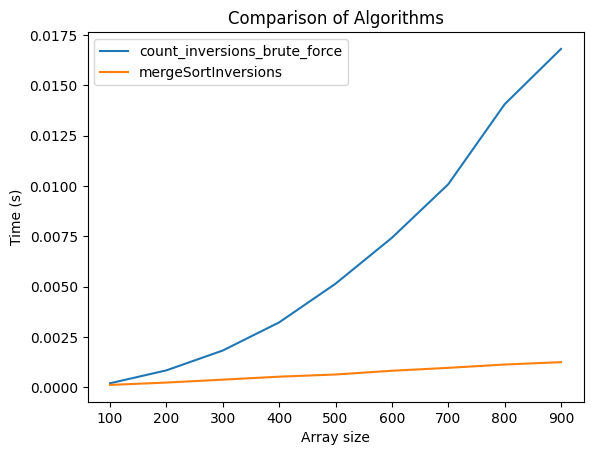

In [291]:
import matplotlib.pyplot as plt


def plot_test_results():
    array_sizes = list(range(100, 1000, 100))
    times_brute_force = []
    times_merge_sort = []

    for size in array_sizes:
        times_brute_force.append(test_sorting_algorithm(count_inversions_brute_force, size))
        times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))

    plt.plot(array_sizes, times_brute_force, label='count_inversions_brute_force')
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()

    '''
    # Adiciona o tempo correspondente em cima de cada ponto do gráfico
    for x, y in zip(array_sizes, times_brute_force):
        plt.text(x, y, f'{y * 1000:.2f} ms', ha='center', va='bottom', fontsize=8, color='blue')
    for x, y in zip(array_sizes, times_merge_sort):
        plt.text(x, y, f'{y * 1000:.2f} ms', ha='center', va='bottom', fontsize=8, color='orange')'''
    plt.show()

plot_test_results()


## 4) Extra

##### 4.a) [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em 2) e refaça os testes empíricos realizados em 3) para avaliar se as melhorias são visíveis na prática.
Nota: É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma
breve discussão sobre a ordem de complexidade do algoritmo melhorado.

**R:Possíveis melhoria ao Algoritmo apresentado em 2:**
- Utilização do Algoritmo do BruteForce, apresentado em 2b., para Arrays de tamanho menor ao igual a 7. Desta forma, conseguimos utilizar o melhor dos dois Algoritmos, o count_inversions_brute_force para a contagem de arrays pequenos e o merge para arrays maiores.


In [280]:

def mergeSortInversionsImproved(arr):
    return mergeSortInversions(arr)
    
def mergeSortImproved(left, right, arr):
    BRUTEFORCE_ARRAY_LIMIT = 7
    
    if(len(arr) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(arr)
    elif(len(left) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(left)
    elif(len(right) <= BRUTEFORCE_ARRAY_LIMIT):
        return count_inversions_brute_force(right)
    else:
    
        return merge(left, right, arr)


#testes
array = list(range(10000))
random.shuffle(array)
print(array)
arrayCopy = array.copy()
arrayBr = array.copy()
print(arrayCopy)
print(arrayBr)
print("MegeSort original :", mergeSortInversions(array))
print("MegeSort melhorado:", mergeSortInversionsImproved(arrayCopy))
print("Bruteforce:", count_inversions_brute_force(arrayBr))
print(array)
print(arrayCopy)
print(arrayBr)

[8226, 1204, 8370, 8491, 3589, 7060, 2188, 1651, 6282, 4095, 595, 4425, 4370, 3659, 4508, 1794, 1752, 2627, 4673, 2645, 4718, 1597, 7564, 2775, 5628, 9976, 2558, 479, 3669, 1901, 6629, 2716, 9124, 4862, 2685, 7175, 1396, 9620, 7741, 8101, 4297, 2744, 6958, 2946, 3651, 3099, 2256, 7284, 6351, 2748, 3780, 9336, 3096, 5772, 9905, 9349, 5959, 8238, 3025, 9893, 4851, 266, 9730, 8869, 9759, 6090, 6081, 2574, 1397, 8353, 9633, 1225, 2046, 9570, 9340, 6322, 8849, 1024, 6791, 3499, 8109, 8156, 6727, 1241, 7805, 7940, 4057, 4963, 1359, 6367, 5458, 8523, 5918, 882, 3678, 699, 7133, 6499, 6314, 848, 9001, 8304, 6033, 7192, 8046, 7011, 9038, 8838, 332, 6266, 8254, 8506, 4220, 3724, 6059, 8938, 535, 8687, 8943, 9877, 4867, 1853, 5737, 3327, 3512, 9398, 3487, 6781, 6349, 841, 9075, 8856, 2853, 6643, 9558, 2638, 6692, 4480, 197, 9588, 4250, 1356, 1504, 2630, 1120, 9288, 8020, 3347, 9881, 4420, 376, 5570, 5767, 7024, 3592, 4889, 9803, 1728, 1202, 9580, 2762, 2960, 2470, 1585, 4910, 4794, 6025, 4907, 58

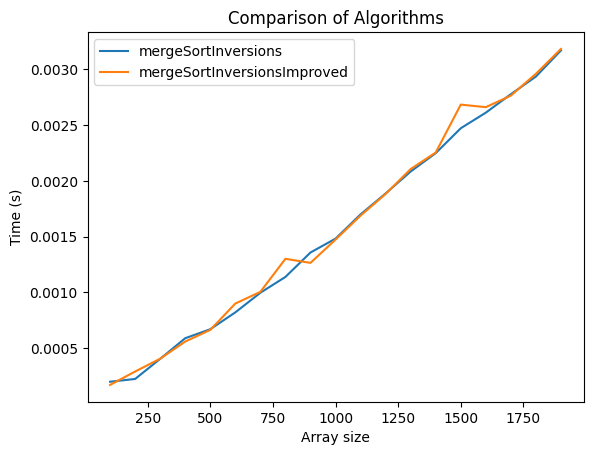

In [284]:
#TESTES EMPIRICOS

def plot_test_results1():
    array_sizes = list(range(100, 2000, 100))
    times_brute_force = []
    times_merge_sort = []
    times_merge_sort_improved = []

    for size in array_sizes:
        times_brute_force.append(test_sorting_algorithm(count_inversions_brute_force, size))
        times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))
        times_merge_sort_improved.append(test_sorting_algorithm(lambda arr: mergeSortInversionsImproved(arr), size))

    #plt.plot(array_sizes, times_brute_force, label='count_inversions_brute_force')
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions')
    plt.plot(array_sizes, times_merge_sort_improved, label='mergeSortInversionsImproved')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()
    plt.show()


plot_test_results1()

## 5) Questões Éticas

##### Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos

##### 5.a) Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.

##### 5.b) Deve citar todas as fontes que utilizou fora do material da UC.